In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(101)

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
items = {
    'dataFeatures' : [i for i in df.columns],
    'dataType' : [i for i in df.dtypes],
    'null' : [i for i in df.isnull().sum()],
    'nullPct' : [i for i in (df.isnull().sum() * 100 / len(df)).round(2)],
    'unique' : [i for i in df.nunique()],
#     'uniqueSample' : [unique()]
}

df1 = pd.DataFrame(items)
df1

,dataFeatures,dataType,null,nullPct,unique
0,survived,int64,0,0.00,2
1,pclass,int64,0,0.00,3
2,sex,object,0,0.00,2
3,age,float64,177,19.87,88
4,sibsp,int64,0,0.00,7
5,parch,int64,0,0.00,7
6,fare,float64,0,0.00,248
7,embarked,object,2,0.22,3
8,class,category,0,0.00,3
9,who,object,0,0.00,3


In [7]:
df1['dataFeatures'].unique().tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [8]:
for uni in df['survived'].unique():
    print(uni)

0
1


In [9]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [10]:
df.groupby(['sex']).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [11]:
df.groupby(['sex']).std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698,0.000000,0.490939
male,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263,0.254225,0.453081


In [12]:
df.groupby(['sex']).min()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,0,1,0.75,0,0,6.75,child,False,no,False
male,0,1,0.42,0,0,0.00,child,False,no,False


In [13]:
df.groupby(['sex']).count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [14]:
df.groupby(['sex']).describe().transpose()

sex                 female        male
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000

### 7. Filter

#### Berapa banyak jumlah datanya kalau datanya cuma class = First dan class = Third ?

#### Berapa mean umur pria dari campuran class First dan Third?

#### lalu munculkan 5 data teratas dari filter tersebut dan cuma kolom sex dan age aja yang muncul

In [15]:
len(df[(df['class'] == 'First') | (df['class'] == 'Third')])

707

In [16]:
df[(df['class'] == 'First') | (df['class'] == 'Third')].groupby('sex').mean().loc['male']['age']

30.72271186440678

In [17]:
print("Jumlah Data: {}".format(len(df[(df['class'] == 'First') | (df['class'] == 'Third')])))
print("Mean Umur Pria: {}".format(df[(df['class'] == 'First') | (df['class'] == 'Third')].groupby('sex').mean().loc['male']['age']))

Jumlah Data: 707
Mean Umur Pria: 30.72271186440678


In [18]:
df[(df['class'] == 'First') | (df['class'] == 'Third')][['sex','age']].head()

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [19]:
df[(df['class'] == 'Second') & (df['alone'] == True)]['fare'].sum()

1462.875

In [20]:
# pd.isnull(df[df['age']=='']).value_counts()

In [21]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [22]:
df.isnull().age.sum()

177

In [23]:
df[df['who'] == 'child'].age.isnull().sum()

0

In [24]:
# df[df['who'] == 'child'].age.isnull().value_counts().loc[True]

In [25]:
print("Banyak NaN man & mean: {} & {}".format(df[df['who'] == 'man'].age.isnull().value_counts().loc[True], df[df['who'] == 'man'].age.mean()))
print("Banyak NaN woman & mean: {} & {}".format(df[df['who'] == 'woman'].age.isnull().value_counts().loc[True], df[df['who'] == 'woman'].age.mean()))
print("Banyak NaN child & mean: {} & {}".format(df[df['who'] == 'child'].age.isnull().sum(), df[df['who'] == 'child'].age.mean() ))

Banyak NaN man & mean: 124 & 33.17312348668281
Banyak NaN woman & mean: 53 & 32.0
Banyak NaN child & mean: 0 & 6.369518072289157


In [26]:
missingIndex = df[df['age'].isnull()].index
df.loc[missingIndex]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
42,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True


In [27]:
def isiNull(row):
    if pd.isnull(row['age']):
        for i in df['who'].unique():
            if (row['who'] == i):   
                return df[df['who'] == i]['age'].mean()
    else:
        return row['age']
    
df['age'] = df.apply(isiNull, axis=1)
# df['age'] = df['age'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [29]:
df[df['who'] == 'man'].age.mean()

33.17312348668271

In [30]:
print("Banyak NaN man & mean: {} & {}".format(df[df['who'] == 'man'].age.isnull().sum(), df[df['who'] == 'man'].age.mean()))
print("Banyak NaN woman & mean: {} & {}".format(df[df['who'] == 'woman'].age.isnull().sum(), df[df['who'] == 'woman'].age.mean()))
print("Banyak NaN child & mean: {} & {}".format(df[df['who'] == 'child'].age.isnull().sum(), df[df['who'] == 'child'].age.mean() ))

Banyak NaN man & mean: 0 & 33.17312348668271
Banyak NaN woman & mean: 0 & 32.0
Banyak NaN child & mean: 0 & 6.369518072289157


In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
print("Modus Embarked: {}".format(df.embarked.mode().loc[0]))

Modus Embarked: S


In [33]:
print("Modus Embark Town = {}".format(df.embark_town.mode().loc[0]))

Modus Embark Town = Southampton


In [34]:
print("Modus Deck = {}".format(df.deck.mode().loc[0]))

Modus Deck = C


In [35]:
df.embarked.isnull().value_counts()

False    889
True       2
Name: embarked, dtype: int64

In [36]:
df.embark_town.isnull().value_counts()

False    889
True       2
Name: embark_town, dtype: int64

In [37]:
df.deck.isnull().value_counts()

True     688
False    203
Name: deck, dtype: int64

In [38]:
misEm = df[df['embarked'].isnull()].index
misMt = df[df['embark_town'].isnull()].index
misd = df[df['deck'].isnull()].index

In [52]:
df.loc[misd]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,33.173123,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False
12,0,3,male,20.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
13,0,3,male,39.000000,1,5,31.2750,S,Third,man,True,C,Southampton,no,False
14,0,3,female,14.000000,0,0,7.8542,S,Third,child,False,C,Southampton,no,True


In [40]:
df['embarked'].mode()[0]

'S'

In [41]:
df['embarked'] = df[['embarked']].apply(lambda row : df['embarked'].mode()[0] if pd.isnull(row.embarked) else row.embarked, axis=1)

In [42]:
df['embark_town'] = df[['embark_town']].apply(lambda row : df['embark_town'].mode()[0] if pd.isnull(row.embark_town) else row.embark_town, axis=1)

In [48]:
df['deck'] = df[['deck']].apply(lambda row : df['deck'].mode()[0] if pd.isnull(row.deck) else row.deck, axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           891 non-null object
embark_town    891 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(6)
memory usage: 86.3+ KB


In [45]:
df.loc[misEm]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,S,First,woman,False,B,Southampton,yes,True


In [115]:
items = {
    'id' : [i for i in range(1,len(df['class'].unique())+1)],
    'mean_fare' : [df[df['class'] == i].fare.mean() for i in sorted(df['class'].unique())],
    'std_fare' : [df[df['class'] == i].fare.std() for i in sorted(df['class'].unique())],
    'batas_min_fare' : [(df[df['class'] == i].fare.mean() - (3* df[df['class'] == i].describe().fare.loc['std'])) for i in sorted(df['class'].unique())],
    'batas_max_fare' : [(df[df['class'] == i].fare.mean() + (3* df[df['class'] == i].describe().fare.loc['std'])) for i in sorted(df['class'].unique())]
}

df2 = pd.DataFrame(items)
df2

,id,mean_fare,std_fare,batas_min_fare,batas_max_fare
0,1,84.154687,78.380373,-150.986430,319.295805
1,2,20.662183,13.417399,-19.590013,60.914379
2,3,13.675550,11.778142,-21.658875,49.009975


In [58]:
df[df['class'] == 'First'].fare.mean()

84.15468749999992

In [85]:
sorted(df['class'].unique())

['First', 'Second', 'Third']

In [110]:
len(df['class'].unique())

3

In [87]:
for i in sorted(df['class'].unique()):
    print(df[df['class'] == i].fare.max())

512.3292
73.5
69.55


In [108]:
(df[df['class'] == 'First'].fare.mean() + (3* df[df['class'] == 'First'].describe().fare.loc['std']))

319.2958054401864

In [98]:
df['fare'].describe().loc['std']

49.693428597180905

In [100]:
df['fare'].mean()

32.2042079685746

In [127]:
df[df['class'] == 'First'].fare.std()

78.38037264672884

In [138]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [144]:
df['class'].value_counts()[0]

216

In [143]:
df['class'].value_counts()[1]

184

In [141]:
df['class'].value_counts()[2]

491

In [145]:
def get_num_outliers (column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    return sum((column<q1) | (column>q3))

In [149]:
outliers = df.groupby('class').agg([get_num_outliers])
outliers

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers
class,,,,,,,,
First,0,0,106,8,53,107.0,False,False
Second,0,0,83,9,18,81.0,False,False
Third,119,0,182,57,110,214.0,False,False


In [151]:
outl

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [152]:
def isiRowOutlier(row):
    if (row['class'] == 'First'):
        return 1
    if (row['class'] == 'Second'):
        return 2
    if (row['class'] == 'Third'):
        return 3

    
df['outliercalcId'] = df.apply(isiRowOutlier, axis=1)

In [155]:
df.outliercalcId.value_counts()

3    491
1    216
2    184
Name: outliercalcId, dtype: int64

In [156]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3


In [172]:
dfOt = df[df['class'] == 'First']

In [185]:
len(dfOt[(dfOt['fare'] < 319.295805) & (dfOt['fare'] > -150.986430)])

213

In [181]:
213/len(df)

0.23905723905723905

In [161]:
df[df['class'] == 'First'].fare.mean()

84.15468749999992

In [170]:
(df[df['class'] == 'First'].fare.mean() - (3* df[df['class'] == 'First'].describe().fare.loc['std']))

-150.9864304401866

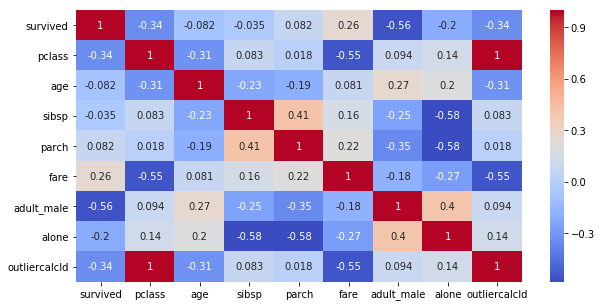

In [193]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
survived         891 non-null int64
pclass           891 non-null int64
sex              891 non-null object
age              891 non-null int64
sibsp            891 non-null int64
parch            891 non-null int64
fare             891 non-null float64
embarked         891 non-null object
class            891 non-null category
who              891 non-null object
adult_male       891 non-null bool
deck             891 non-null object
embark_town      891 non-null object
alive            891 non-null object
alone            891 non-null bool
outliercalcId    891 non-null int64
dtypes: bool(2), category(1), float64(1), int64(6), object(6)
memory usage: 93.3+ KB


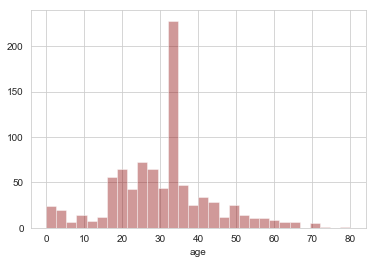

In [216]:
sns.distplot(df['age'], bins=30, kde=False, color='darkred')

In [217]:
df.to_csv('Titanic.csv', index=True)
df2.to_csv('TitanicOutCalc.csv', index=True)

In [220]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [229]:
df.groupby(['sex'])['sex'].describe().mean()

count     445.5
unique      1.0
freq      445.5
dtype: float64

In [230]:
df[df['survived'] == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
5,0,3,male,33,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True,3
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,3
12,0,3,male,20,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
13,0,3,male,39,1,5,31.2750,S,Third,man,True,C,Southampton,no,False,3
14,0,3,female,14,0,0,7.8542,S,Third,child,False,C,Southampton,no,True,3
16,0,3,male,2,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False,3
18,0,3,female,31,1,0,18.0000,S,Third,woman,False,C,Southampton,no,False,3
